In [46]:
import time
import numpy
import pandas
pandas.set_option('display.max_colwidth', 0)
import collections

from IPython import display

import matplotlib
matplotlib.rcParams['figure.figsize'] = (15.0, 10.0)
from matplotlib import pyplot

from scipy.stats import norm

from sklearn.datasets import make_classification
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import load_iris
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.model_selection import KFold
from sklearn.preprocessing import minmax_scale

_times = []
def checkTime(maxduration, question):
    duration = _times[-1] - _times[-2]
    if duration > maxduration:
        print("[ATTENTION] Votre code pour la question {0} met trop de temps à s'exécuter! ".format(question)+
            "Le temps maximum permis est de {0:.4f} secondes, mais votre code a requis {1:.4f} secondes! ".format(maxduration,duration)+
            "Assurez-vous que vous ne faites pas d'appels bloquants (par exemple à show()) dans cette boucle!")

In [76]:
# Implémentation du discriminant linéaire
# Implementation of the linear discriminant
class DiscriminantLineaire:
    def __init__(self, eta=1e-2, epsilon=1e-2, max_iter=1000):

        # Cette fonction est déjà codée, utilisez les variables membres
        # qu'elle définit dans les autres fonctions
        # This function is already coded, use the member variables it
        # defines in other functions
        self.eta = eta
        
        # Epsilon et max_iter sont des paramètres du critère d'arrêt
        # max_iter est le nombre maximum de mises à jour des poids,
        # alors qu'epsilon est un seuil sur la différence minimale entre les
        # erreurs faites entre deux itérations consécutives pour continuer l'entraînement
        # Epsilon and max_iter are parameters for the stop criterion
        # max_iter is the maximum number of weights updates allowed, while
        # epsilon is a threshold on the minimum error difference observed between
        # two consecutive training steps.
        self.epsilon = epsilon
        self.max_iter = max_iter

    def normalize_y(self, y):
        return -2*y + 1
    
    def transform_to_output(self, y):
        y = numpy.abs(((y/numpy.abs(y)) - 1)/-2)
        return y.astype(int)

    def error_function(self, w, X, y):
        """
            w : wieght of our model vector in [DX1]
            X : matrix of [NxD]
            y : output function juste an array
        """
        # transpose matrix to have DxN
        X=X.T
        w_0_index = w.shape[0] - 1
        return y - (w[:w_0_index, :].T.dot(X) + w[w_0_index]) 
    
    def maj_w_i(self, err, X):
        """
            err: resultat of the error function in [1XN]
            X: matrix of our features [NxD]
        """
        return err.dot(X)/numpy.sum(X**2)
    
    def maj_w_0(self, err):
        return numpy.sum(err)

    def function_discriminant(self, X):
        index_w_0 = self.w.shape[0] - 1
        X=X.T
        h = self.w[:index_w_0, :].T.dot(X) + self.w[index_w_0]
        return h.ravel()

    def fit(self, X, y):
        # Implémentez la fonction d'entraînement selon les équations développées
        # à la question précédente.
        # Implement the training function according to the equations developed at the
        # previous question

        # On initialise les poids aléatoirement
        # Weights are randomly initialized
        w = numpy.random.rand(X.shape[1]+1)

        y = self.normalize_y(y)

        # *** TODO Q2B ***
        # Implémentez ici l'entraînement dans la boucle suivante,
        # qui se répète self.max_iter fois.
        # Vous êtes libres d'utiliser les noms de variables de votre choix, sauf
        # pour les poids qui doivent être contenus dans la variable w définie plus haut
        # Implement here the training in the following loop, which is 
        # repeated self.max_iter times
        # You are free to use the variables names of your choice, except
        # for the weights, which should be put in variable w defined above
        """change shape of array"""
        w = w.reshape((len(w), 1))
        for i in range(self.max_iter):
            # Retirez le "pass" et compléter le code ici
            # Remove the "pass" and complete the code here
            index_w_0 = w.shape[0] - 1 

            w_prime = numpy.zeros_like(w)
            err = self.error_function(w, X, y)
            w_prime[:index_w_0, :] = w[:index_w_0, :] + (self.eta * self.maj_w_i(err, X)).T
            w_prime[index_w_0] = w[index_w_0] + self.eta * self.maj_w_0(err)
            
            delta_w = numpy.abs(numpy.sum(w_prime) - numpy.sum(w))

            w = w_prime
            if delta_w <= self.epsilon:
                break 
        # ******

        # Copie des poids entraînés dans une variable membre pour les conserver
        # Copy trained weights in a member variable for storing
        self.w = w
    
    def predict(self, X):
        # *** TODO Q2B ***
        # Implémentez la fonction de prédiction
        # Implement the prediction function

        # Retirez le "pass" et complétez le code ici
        # Remove the "pass" and complete the code here
        # ******
        """transpose matrix to look like array of vector"""
        h = self.function_discriminant(X)
        return self.transform_to_output(h)
    
    def score(self, X, y):
        # *** TODO Q2B ***
        # Implémentez la fonction retournant le score, soit la précision (accuracy)
        # du classifieur sur les données reçues en argument.
        # Vous pouvez supposer que fit() a préalablement été exécuté
        # Indice : réutiliser votre implémentation de predict() réduit de
        # beaucoup la taille de cette fonction!
        # Implement the function returning the classifier score, that is the accuracy
        # on data received as argument.
        # You can assume that fit() has been executed before
        # Tip: reusing your implementation of predict() reduces significantly the 
        # size of this function!

        # Retirez le "pass" et complétez le code ici
        # Remove the "pass" and complete the code here
        values, count = numpy.unique(y, return_counts=True)
        feature_number = len(values)

        confusion_matrice = numpy.zeros((feature_number, feature_number))
        y_predict = self.predict(X)
        
        for i in range(len(y)):
            confusion_matrice[y[i], y_predict[i]] += 1

        accurency = numpy.sum(confusion_matrice.diagonal())/len(y)

        return accurency

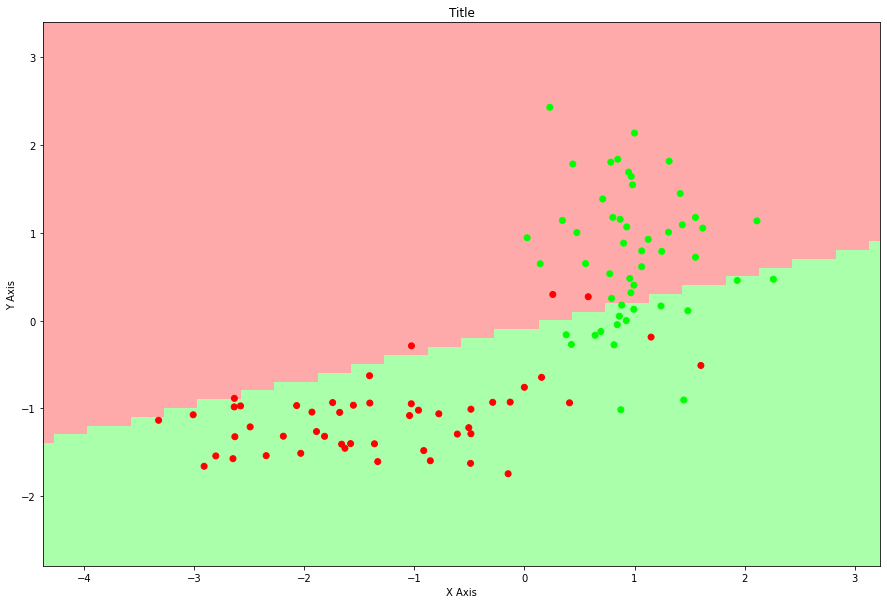

,DiscriminantLineaire
Erreurs,0.81


In [77]:
# Durée d'exécution maximale / maximum execution time
TMAX_Q2C = 10.0
_times.append(time.time())

# Problème à 2 classes / 2-class problem
X, y = make_classification(n_features=2,
                           n_redundant=0,
                           n_informative=2,
                           n_clusters_per_class=1)

# *** TODO Q2C ***
# Créez ici une grille permettant d'afficher les régions de
# décision pour chaque classifieur
# Indice : numpy.meshgrid pourrait vous être utile ici
# N'utilisez pas un pas trop petit!

# Create a grid here to display the decision regions for each
# decision regions for each classifier
# Tip: numpy.meshgrid might be useful here
# Don't use a too small step size!

# Entraînez le discriminant linéaire implémenté
# Train the implemented linear discriminant
classifieur = DiscriminantLineaire()
classifieur.fit(X, y)
# Testez la performance du discriminant linéaire pour le problème
# Test the performance of the linear discriminant for the problem
err_clf = 1 - classifieur.score(X, y)
error = { 'DiscriminantLineaire': err_clf }

# Créer la figure à afficher
# Create the figure to display

cmap_light = matplotlib.colors.ListedColormap(['#FFAAAA', '#AAFFAA'])
cmap_bold = matplotlib.colors.ListedColormap(['#FF0000', '#00FF00'])

# Creation de meshgrid
pt_X1 = numpy.arange(X[:, 0].min() - 1, X[:, 0].max() + 1, step=0.1)
pt_X2 = numpy.arange(X[:, 1].min() - 1, X[:, 1].max() + 1, step=0.1)
X1_mesh, X2_mesh = numpy.meshgrid(pt_X1, pt_X2)
y_mesh = numpy.array([X1_mesh.ravel(), X2_mesh.ravel()]).T


fig = pyplot.figure()
ax = fig.add_subplot(111)

# Utilisez la grille que vous avez créée plus haut
# pour afficher les régions de décision, de même
# que les points colorés selon leur vraie classe
# N'oubliez pas la légende !
# Use the grid you created above
# to display the decision regions, as well as
# coloured points according to their true class
# Don't forget the legend!

ax.set_title("Title")   # À modifier / to be modified
ax.set_xlabel("X Axis") # À modifier / to be modified
ax.set_ylabel("Y Axis") # À modifier / to be modified
#ax.contourf() # À compléter / to be completed
#ax.scatter()  # À compléter / to be completed
predicts = classifieur.predict(y_mesh).reshape(X1_mesh.shape)
ax.pcolormesh(X1_mesh, X2_mesh, predicts, cmap=cmap_light)
ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)

fig.add_subplot(ax)

pyplot.show()

df = pandas.DataFrame(error, index=['Erreurs'])
display.display(df)

_times.append(time.time())
checkTime(TMAX_Q2C, "Q2C")

In [78]:
# Durée d'exécution maximale
# Maximum execution duration
TMAX_Q2D = 60

# Dictionnaire pour enregistrer les paramètres évalués
# Dictionnary for recording evaluated parameters
params = collections.defaultdict(list)
params['classifier'] = []

_times.append(time.time())

# *** TODO Q2D ***

# Chargez les données "Breast cancer Wisconsin" et normalisez-les de
# manière à ce que les valeurs minimum/maximum tiennent dans le domaine [0, 1]
# Load "Breast cancer Wisconsin" dataset and normalize it in order to
# get their minimum/maximum values in the [0, 1] domain
X,y = load_breast_cancer(return_X_y=True)
X = minmax_scale(X)

# Comparez les diverses approches demandées dans l'énoncé sur Breast Cancer
# Initialisez votre discriminant linéaire avec les paramètres suivants :
# DiscriminantLineaire(eta=1e-4, epsilon=1e-6, max_iter=10000)
# N'oubliez pas que l'évaluation doit être faite par une validation
# croisée à K=3 plis!
# Compare the various approaches requested in the statement on Breast Cancer
# Initialize your linear discriminant with the following parameters:
# DiscriminantLineaire(eta=1e-4, epsilon=1e-6, max_iter=10000)
# Don't forget that the evaluation must be done by a cross validation 
# with K=3 folds!

# Initialiser les différents classifieurs
# Initialize the various classifiers
classifiers = [DiscriminantLineaire(eta=1e-4, epsilon=1e-6, max_iter=10000),
               LinearDiscriminantAnalysis(), # Ajustez les hyperparamètres! / Adjust the hyperparameters!
               LogisticRegression(),         # Ajustez les hyperparamètres! / Adjust the hyperparameters!
               Perceptron(),                 # Ajustez les hyperparamètres! / Adjust the hyperparameters!
              ]

# Créer le tableau pour accumuler les résultats
# Create the table to accumulate the results
results = {'Classifiers':[],
           'Train_err':[],
           'Valid_err':[],
           'Exec_time':[],
           'Comments':[],
          }

for clf in classifiers:
    clf_name = clf.__class__.__name__
    if clf_name not in results['Classifiers']:
        results['Classifiers'].append(clf_name)
    
    # Boucle d'entraînement à faire
    # Training loop to be done
    kFolds = KFold(n_splits=3)
    splits = kFolds.split(X)

    err_train = []
    err_test = []

    start_time = time.time()

    for train_index, test_index in splits:
        X_train, y_train = X[train_index], y[train_index]
        X_test, y_test = X[test_index], y[test_index]

        clf.fit(X_train, y_train)

        err_train.append(1 - clf.score(X_train, y_train))
        err_test.append(1 - clf.score(X_test, y_test))

    end_time = time.time()

    # Validation croisée (K=3) à faire
    # Cross-validation (K=3) to be done
    # Mesure du temps d'exécution à faire
    # Measuring execution time to be done

    # Ajoutez l'erreur d'entraînement dans la variable train_err
    # Add training error in variable train_err
    train_err = numpy.mean(err_train)  # Remplacez le 0 par la valeur / replace the 0 with the value
    results['Train_err'].append(train_err)  
    
    # Ajoutez l'erreur de validation dans la variable valid_err
    # Add validation error in variable valid_err
    valid_err = numpy.mean(err_test)  # Remplacez le 0 par la valeur / replace the 0 with the value
    results['Valid_err'].append(valid_err)
    
    # Ajoutez le temps de calcul mesuré dans la variable exec_time
    # Add measure execution time in variable exec_time
    exec_time = end_time - start_time # Remplacer le 0 par la valeur / replace the 0 with the value
    results['Exec_time'].append(exec_time)

# ******

_times.append(time.time())
checkTime(TMAX_Q2D, "Q2D")


# *** TODO Q4C ***
# Ajoutez les commentaires et les hyperparamètres (HP)
# utilisés pour chaque classifieur demandé 
# Add comments and hyperparameters (HP) used for each
# classifier requested

# Ajoutez vos commentaires
# Add your comments
comments = "Commentaires pour le \
            DiscriminantLineaire ici."
results['Comments'].append(comments)

# Ajoutez vos commentaires et HP pour le LinearDiscriminantAnalysis
# Add your comments and HP for LinearDiscriminantAnalysis
comments = "Commentaires & HP pour le \
            LinearDiscriminantAnalysis ici."
results['Comments'].append(comments)

# Ajoutez vos commentaires et HP pour le LogisticRegression
# Add your comments and HP for LogisticRegression
comments = "Commentaires & HP pour la \
            LogisticRegression ici."
results['Comments'].append(comments)

# Ajoutez vos commentaires et HP pour le Perceptron
# Add your comments and HP for Perceptron
comments = "Commentaires & HP pour le \
            Perceptron ici."
results['Comments'].append(comments)

# *****


# Affichage des erreurs
# Plot the errors
df = pandas.DataFrame(results)
display.display(df)

,Classifiers,Train_err,Valid_err,Exec_time,Comments
0,DiscriminantLineaire,0.096646,0.094858,4.240285,Commentaires pour le DiscriminantLineaire ici.
1,LinearDiscriminantAnalysis,0.032514,0.047406,0.008494,Commentaires & HP pour le LinearDiscriminantAnalysis ici.
2,LogisticRegression,0.031634,0.045642,0.016447,Commentaires & HP pour la LogisticRegression ici.
3,Perceptron,0.019331,0.038643,0.003990,Commentaires & HP pour le Perceptron ici.


In [152]:
# Implémentation du classifieur un contre tous utilisant le discriminant 
# linéaire défini précédemment
# Implementation of the one-against-all classifier using the linear discriminant
# defined previously
class ClassifieurUnContreTous:
    def __init__(self, n_classes, **kwargs):
        # Cette fonction est déjà codée pour vous, vous n'avez qu'à utiliser
        # les variables membres qu'elle définit dans les autres fonctions
        # This function is already coded for you, you just have to use
        # the member variables it defines in the other functions
        self.n_classes = n_classes
        self.estimators = [DiscriminantLineaire(**kwargs) for c in range(n_classes)]

    '''Refaire se code sale '''
    def get_class_output(self, y):
        y_c = []
        for c in range(self.n_classes):
            out = numpy.zeros_like(y)
            for i, e in enumerate(y):
                if e == c:
                    out[i] = 0
                else:
                    out[i] = 1
            y_c.append(out)
        return tuple(y_c)
    
    def fit(self, X, y):
        # *** TODO Q2E ***
        # Entraînez chaque classifieur (contenu dans self.estimators)
        # pour distinguer une seule classe des autres
        # Train each classifier (contained in self.estimators)
        # to distinguish a single class from others

        # Retirez le "pass" et compléter le code ici
        # Remove the "pass" and complete the code here
        
        # ******
        Y = self.get_class_output(y)
        for i, y_i in enumerate(Y):
            self.estimators[i].fit(X, y_i) 
    
    def predict(self, X):
        # *** TODO Q2E ***
        # Faire les prédictions selon l'approche un contre tous
        # Vous pouvez supposer que fit() a préalablement été exécuté
        # Make predictions using the one-to-many approach
        # You can assume that fit() has been previously executed

        # Retirez le "pass" et complétez le code ici
        # Remove the "pass" and complete the code here
        # ******
        h_i = numpy.array([estimator.function_discriminant(X) for estimator in self.estimators])
        y = numpy.argmax(h_i.T, axis=1)

        return y

    
    def score(self, X, y):
        # *** TODO Q2E ***
        # Implémentez ici le calcul du score utilisant l'approche un contre tous
        # Ce score correspond à la précision (accuracy) moyenne
        # Vous pouvez supposer que fit() a préalablement été exécuté
        # Implement here the calculation of the score using the one against all approach
        # This score corresponds to the average accuracy
        # You can assume that fit() has been previously executed

        # Retirez le "pass" et complétez le code ici
        # Remove the "pass" and complete the code here
        confusion_matrice = numpy.zeros((self.n_classes, self.n_classes))
        y_predict = self.predict(X)
        
        for i in range(len(y)):
            confusion_matrice[y[i], y_predict[i]] += 1
        
        accurency = numpy.sum(confusion_matrice.diagonal())/len(y)

        return accurency


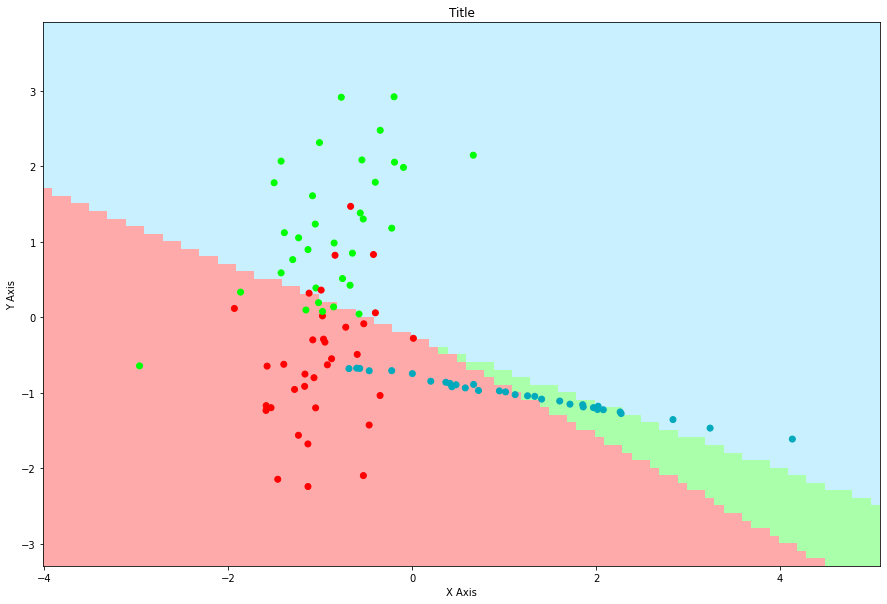

,DiscriminantLineaire
Erreurs,0.69


In [174]:
# Durée d'exécution maximale / maximum execution time
TMAX_Q2F = 10.0
_times.append(time.time())

# Problème à 3 classes / 3-class problem
X, y = make_classification(n_features=2,
                           n_redundant=0,
                           n_informative=2,
                           n_clusters_per_class=1,
                           n_classes=3)

# *** TODO Q2F ***
# Créez ici une grille permettant d'afficher les régions de
# décision pour chaque classifieur
# Indice : numpy.meshgrid pourrait vous être utile ici
# N'utilisez pas un pas trop petit!
classifieur = ClassifieurUnContreTous(3)
classifieur.fit(X,y)

err_clf = 1 - classifieur.score(X, y)
error = { 'DiscriminantLineaire': err_clf }

cmap_light = matplotlib.colors.ListedColormap(['#FFAAAA', '#AAFFAA', '#c9f0ff'])
cmap_bold = matplotlib.colors.ListedColormap(['#FF0000', '#00FF00', '#00a9bc'])

# Create a grid here to display the decision regions for each
# decision regions for each classifier
# Tip: numpy.meshgrid might be useful here
# Don't use a too small step size!
pt_X1 = numpy.arange(X[:, 0].min() - 1, X[:, 0].max() + 1, step=0.1)
pt_X2 = numpy.arange(X[:, 1].min() - 1, X[:, 1].max() + 1, step=0.1)
X1_mesh, X2_mesh = numpy.meshgrid(pt_X1, pt_X2)
y_mesh = numpy.array([X1_mesh.ravel(), X2_mesh.ravel()]).T

# Entraînez le modèle un contre tous implémenté
# Train the implemented one-against-all model

# Testez la performance du modèle pour le problème
# Test the performance of the model for the problem

# Créer la figure à afficher
# Create the figure to display
fig = pyplot.figure()
ax = fig.add_subplot(111)

# Utilisez la grille que vous avez créée plus haut
# pour afficher les régions de décision, de même
# que les points colorés selon leur vraie classe
# N'oubliez pas la légende !
# Use the grid you created above
# to display the decision regions, as well as
# coloured points according to their true class
# Don't forget the legend!

ax.set_title("Title")   # À modifier / to be modified
ax.set_xlabel("X Axis") # À modifier / to be modified
ax.set_ylabel("Y Axis") # À modifier / to be modified
#ax.contourf() # À compléter / to be completed
#ax.scatter()  # À compléter / to be completed

predicts = classifieur.predict(y_mesh).reshape(X1_mesh.shape)
ax.pcolormesh(X1_mesh, X2_mesh, predicts, cmap=cmap_light)
ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)

fig.add_subplot(ax)

pyplot.show()

df = pandas.DataFrame(error, index=['Erreurs'])
display.display(df)

# ******

_times.append(time.time())
checkTime(TMAX_Q2F, "Q2F")

In [175]:
# Durée d'exécution maximale
# Maximum execution duration
TMAX_Q2G = 60

# Dictionnaire pour enregistrer les paramètres évalués
# Dictionnary for recording evaluated parameters
params = collections.defaultdict(list)
params['classifier'] = []

_times.append(time.time())

# *** TODO Q2G ***

# Chargez les données Iris et normalisez-les de
# manière à ce que les valeurs minimum/maximum tiennent dans le domaine [0, 1]
# Load Iris dataset and normalize it in order to
# get their minimum/maximum values in the [0, 1] domain

# Comparez les diverses approches demandées dans l'énoncé sur Iris
# Initialisez votre discriminant linéaire selon un classement un contre tous
# avec les paramètres suivants :
# DiscriminantLineaire(eta=1e-4, epsilon=1e-6, max_iter=10000)
# N'oubliez pas que l'évaluation doit être faite par une validation
# croisée à K=3 plis!
# Compare the various approaches requested in the statement on Iris
# Initialize your one-against-all linear discriminant with the following parameters:
# DiscriminantLineaire(eta=1e-4, epsilon=1e-6, max_iter=10000)
# Don't forget that the evaluation must be done by a cross validation 
# with K=3 folds!
X,y = load_breast_cancer(return_X_y=True)
X = minmax_scale(X)

# Initialisation des différents classifieurs
# Initialize the various classifiers
classifiers = [ClassifieurUnContreTous(n_classes=3, eta=1e-4, epsilon=1e-6, max_iter=10000),
               LinearDiscriminantAnalysis(), # Ajustez les hyperparamètres! / Adjust the hyperparameters!
               LogisticRegression(),         # Ajustez les hyperparamètres! / Adjust the hyperparameters!
               Perceptron(),                 # Ajustez les hyperparamètres! / Adjust the hyperparameters!
              ]

# Création du tableau pour accumuler les résultats
# Create the table to accumulate the results
results = {'Classifiers':[],
           'Train_err':[],
           'Valid_err':[],
           'Exec_time':[],
           'Comments':[],
          }

for clf in classifiers:
    clf_name = clf.__class__.__name__
    if clf_name not in results['Classifiers']:
        results['Classifiers'].append(clf_name)
    
    # Boucle d'entraînement à faire
    # Training loop to be done

    # Validation croisée (K=3) à faire
    # Cross-validation (K=3) to be done
    kFolds = KFold(n_splits=3)
    splits = kFolds.split(X)

    err_train = []
    err_test = []

    start_time = time.time()

    for train_index, test_index in splits:
        X_train, y_train = X[train_index], y[train_index]
        X_test, y_test = X[test_index], y[test_index]

        clf.fit(X_train, y_train)

        err_train.append(1 - clf.score(X_train, y_train))
        err_test.append(1 - clf.score(X_test, y_test))

    end_time = time.time()

    # Mesure du temps d'exécution à faire
    # Measuring execution time to be done

    # Ajoutez l'erreur d'entraînement dans la variable train_err
    # Add training error in variable train_err
    train_err = numpy.mean(err_train)  # Remplacez le 0 par la valeur / replace the 0 with the value
    results['Train_err'].append(train_err)  
    
    # Ajoutez l'erreur de validation dans la variable valid_err
    # Add validation error in variable valid_err
    valid_err = numpy.mean(err_test)  # Remplacer le 0 par la valeur / replace the 0 with the value
    results['Valid_err'].append(valid_err)
    
    # Ajoutez le temps de calcul mesuré dans la variable exec_time
    # Add measure execution time in variable exec_time
    exec_time = end_time - start_time  # Remplacez le 0 par la valeur / replace the 0 with the value
    results['Exec_time'].append(exec_time)

# ******

_times.append(time.time())
checkTime(TMAX_Q2G, "Q2G")


# *** TODO Q2G ***
# Ajoutez les commentaires et les hyperparamètres
# utilisés pour chaque classifieur demandé 
# Add comments and hyperparameters used for each
# classifier requested

# Ajoutez vos commentaires
# Add your comments
comments = "Commentaires pour le \
            ClassifieurUnContreTous ici."
results['Comments'].append(comments)

# Ajoutez vos commentaires et HP pour le LinearDiscriminantAnalysis
# Add your comments and HP for LinearDiscriminantAnalysis
comments = "Commentaires & HP pour le \
            LinearDiscriminantAnalysis ici."
results['Comments'].append(comments)

# Ajoutez vos commentaires et HP pour le LogisticRegression
# Add your comments and HP for LogisticRegression
comments = "Commentaires & HP pour la \
            LogisticRegression ici."
results['Comments'].append(comments)

# Ajoutez vos commentaires et HP pour le Perceptron
# Add your comments and HP for Perceptron
comments = "Commentaires & HP pour le \
            Perceptron ici."
results['Comments'].append(comments)

# *****


# Affichage des erreurs
df = pandas.DataFrame(results)
display.display(df)

,Classifiers,Train_err,Valid_err,Exec_time,Comments
0,ClassifieurUnContreTous,0.341781,0.377685,11.921677,Commentaires pour le ClassifieurUnContreTous ici.
1,LinearDiscriminantAnalysis,0.032514,0.047406,0.007981,Commentaires & HP pour le LinearDiscriminantAnalysis ici.
2,LogisticRegression,0.031634,0.045642,0.016655,Commentaires & HP pour la LogisticRegression ici.
3,Perceptron,0.019331,0.038643,0.002992,Commentaires & HP pour le Perceptron ici.
